In [1]:
import xarray as xr

In [2]:
ds = xr.open_dataset("../data/GLORYS_ocean-temp-currents_1993-2019.nc",
                    chunks = dict(longitude=10, latitude=10))
ds

,Array,Chunk
Bytes,643.73 MiB,1.55 MiB
Shape,"(312, 13, 157, 265)","(312, 13, 10, 10)"
Count,433 Tasks,432 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,643.73 MiB,1.55 MiB
Shape,"(312, 13, 157, 265)","(312, 13, 10, 10)"
Count,433 Tasks,432 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


In [9]:
ds_big = ds.expand_dims(model=100)
ds_big.thetao

,Array,Chunk
Bytes,62.86 GiB,154.72 MiB
Shape,"(100, 312, 13, 157, 265)","(100, 312, 13, 10, 10)"
Count,865 Tasks,432 Chunks
Type,float32,numpy.ndarray


In [ ]:
from dask.distributed import Client

client = Client(n_workers=6)
client

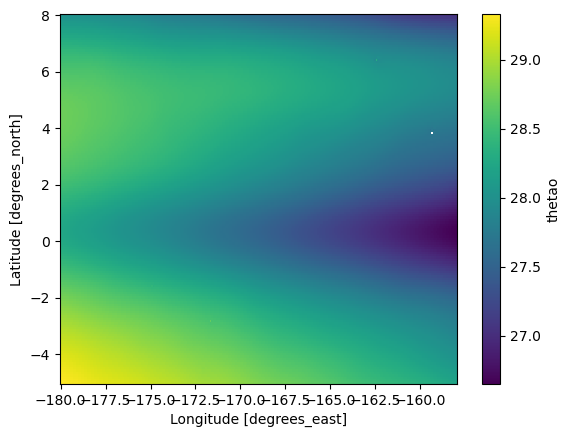

In [10]:
ds_big.thetao.mean(['model','time','depth']).plot()